# TTT4185 Machine learning for Speech technology

## Computer assigment 1: Speech analysis

This assignment assumes that the student has knowledge about short-time spectral estimation, linear prediction modeling and cepstral analysis. You should also know the concept of fundamental frequencies and formants.

Useful plotting commands from `matplotlib.pyplot`: `figure`, `plot`, `subplots`, `pcolormesh`

### Problem 1

In this problem we will look at a speech signal and do simple spectral analysis on the signal.

(a) Download the speech file `stry.wav` from Blackboard and load the file using `scipy.io.wavefile.read`. The speech represents the latter half of the English word "tapestry". The phonetic transcription is /s/ /t/ /r/ /iy/.
- Plot the signal.
- What is characteristic about the sounds /s/, /t/, /r/ and /iy/?
- Take a 40 millisecond subset of the vowel /iy/ and plot it.
- Find the fundamental frequency $f_0$ of the vowel.

In [43]:
import numpy as np
import scipy as sp
import pandas as pd
# import pysptk
import matplotlib.pyplot as plt
%matplotlib inline

def plot_with_linspace(plt_object, data, start, end, **kwargs):
    x_axis = np.linspace(start, end, len(data))
    return plt_object.plot(x_axis, data, **kwargs)

def db(whatever):
    return 20 * np.log10(whatever) 

SAMPLE_RATE, data = sp.io.wavfile.read('stry.wav')

SAMPLE_RATE_MS = SAMPLE_RATE // 1000

print("SAMPLE_RATE:", SAMPLE_RATE)
print("SAMPLE_RATE_MS:", SAMPLE_RATE_MS)
print("len(data)", len(data))
stry_len_ms = len(data) / SAMPLE_RATE_MS
print("stry_len_ms:", stry_len_ms)

SAMPLE_RATE: 16000
SAMPLE_RATE_MS: 16
len(data) 7438
stry_len_ms: 464.875


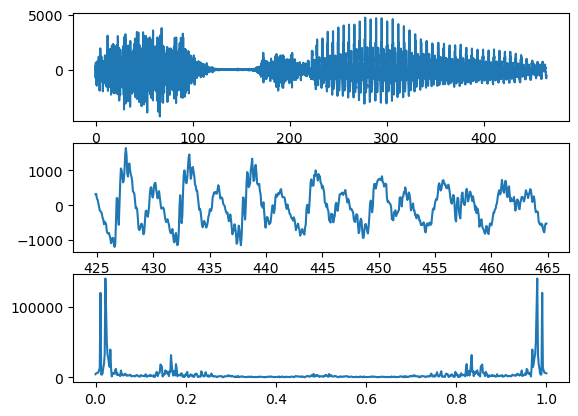

f_0 is 350.0 Hz


In [65]:
fig, (plt1, plt2, plt3) = plt.subplots(3, 1)

plot_with_linspace(plt1, data, 0, stry_len_ms)
vowel = data[-40*SAMPLE_RATE_MS:]
plot_with_linspace(plt2, vowel, stry_len_ms - 40, stry_len_ms)
fft_abs = np.abs(np.fft.fft(vowel))
plot_with_linspace(plt3, fft_abs, 0, 1)
plt.show()
argmax = np.argmax(fft_abs[0:len(fft_abs)//2])
f_0 = argmax * SAMPLE_RATE_MS * 1000 / len(fft_abs)
print(f"f_0 is {f_0} Hz")

(b) Spectral analysis
- Estimate the spectrum of the vowel using an FFT of length 1024. Plot the spectrum expressed in dBs ($20 \log_{10}{x}$) as a function of frequency.
- Multiply the signal by a Hamming window and repeat the last operation.
- Explain the difference between the two spectra.
- Estimate the fundamental frequency $f_0$ using the spectrum, and compare the result to what you got in 1a)
- Roughly estimate the two first formant frequencies.

Useful Python functions: `numpy.fft.fft`, `numpy.abs`, `scipy.signal.hamming`.

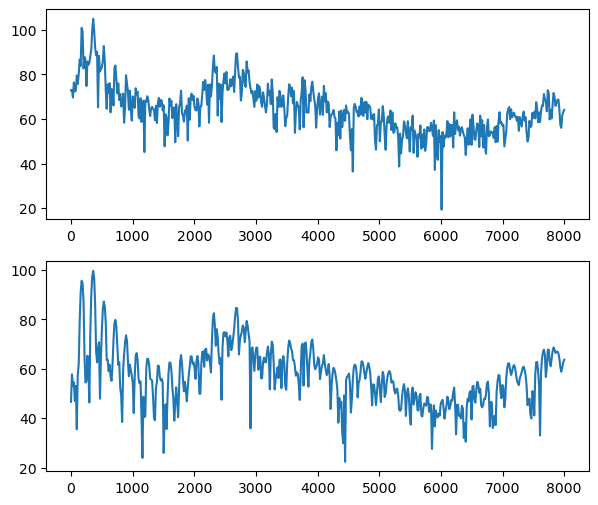

In [45]:
fig, (plt1, plt2) = plt.subplots(2, 1, figsize=(7,6))

vowel_fft = np.fft.fft(vowel, n=1024)
vowel_fft = vowel_fft[:len(vowel_fft)//2]
plot_with_linspace(plt1, db(np.abs(vowel_fft)), 0, 0.5 * SAMPLE_RATE)
hamming_window = sp.signal.windows.hamming(len(vowel))
vowel_after_hamming = vowel * hamming_window
vowel_fft_after_hamming = np.fft.fft(vowel_after_hamming, n=1024)
vowel_fft_after_hamming = vowel_fft_after_hamming[:len(vowel_fft_after_hamming)//2]
plot_with_linspace(plt2, db(np.abs(vowel_fft_after_hamming)), 0, 0.5 * SAMPLE_RATE)
plt.show()

In [46]:
# Estimate f_0
vowel_fft_after_hamming_abs = np.abs(vowel_fft_after_hamming)
argmax = np.argmax(vowel_fft_after_hamming_abs)
f_0 = argmax * SAMPLE_RATE_MS * 1000 / len(vowel_fft_after_hamming_abs)
print("f_0 is", f_0, "Hz")
print("This was about the double of what I got in 1a)")
print("According to the plot, the first 2 formats look to be around 500 Hz and 2.7 kHz")

f_0 is 718.75 Hz
This was about the double of what I got in 1a)
According to the plot, the first 2 formats look to be around 500 Hz and 2.7 kHz


(c) AR modeling
- Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.
- Estimate the spectrum for each of the model orders. Plot the spectrum in dBs as a function of frequency.
- Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?
- Why is it not possible to estimate the fundamental frequency based on the LP model?

Useful Python functions: `pysptk.sptk.lpc`, `scipy.signal.freqz`. Check the documentation of the sptk package https://netix.dl.sourceforge.net/project/sp-tk to know which parameters are returned by the `lpc` function, and what model they correspond to.

In [47]:
print("I tried for an hour, but I'm not able to install pysptk")
print("I tried both `conda install pysptk`, `conda install -c conda-forge pysptk` and `pip install pysptk`.")
print("From conda, it simply doesn't look like the package exists, from pip I get a long and for me not at all understandable error message.")

I tried for an hour, but I'm not able to install pysptk
I tried both `conda install pysptk`, `conda install -c conda-forge pysptk` and `pip install pysptk`.
From conda, it simply doesn't look like the package exists, from pip I get a long and for me not at all understandable error message.


(d) Use `scipy.signal.spectrogram` to create a spectrogram of the entire speech signal. Try to generate both wide- and narrow-band spectrograms by adjusting the window lengths and overlaps. Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?

### Problem 2
In this problem we look at the cepstrum and deconvolution

(a) Compute and plot the real cepstrum of the vowel from problem 1a).

502


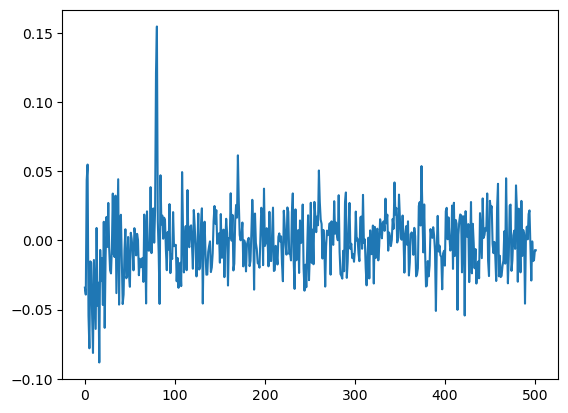

In [59]:
vowel_fft = np.fft.fft(vowel, n=1024)
vowel_cepstrum = np.fft.ifft(np.log(np.abs(vowel_fft)))
vowel_cepstrum_real = np.real(vowel_cepstrum)
vowel_cepstrum_real = vowel_cepstrum_real[10:len(vowel_cepstrum_real)//2]
# plot_with_linspace(plt, vowel_cepstrum_real[10:-10], )
plt.plot(vowel_cepstrum_real)
print(len(vowel_cepstrum_real))
plt.show()

(b) Use the cepstrum to compute the fundamental frequency $f_0$. Compare your results with those obtained in problem 1).

In [66]:
cepstrum_n_0 = np.argmax(vowel_cepstrum_real)
f_0 = SAMPLE_RATE / cepstrum_n_0
print("f_0 is", f_0, "Hz")
print("And this is quite different from both the ones I've gotten previously.")

f_0 is 200.0 Hz
And this is quite different from both the ones I've gotten previously.


(c) In this subproblem you will use the cepstrum to estimate the spectral envelope
- Use liftering to extract the part of the ceptrum that represents the spectral envelope.
- Plot the spectral envelope as a function of frequency, and compare the result with the results from problem 1).

Hint 1: Remember that the cepstrum of a real signal is symmetric, so the liftered signal mus be symmetric as well.

Hint 2: The FFT of a real, symmtric signal is real, but due to round-off errors small imaginary noise may occur. Use `np.real` to get to the real part of the liftered log-spectrum.

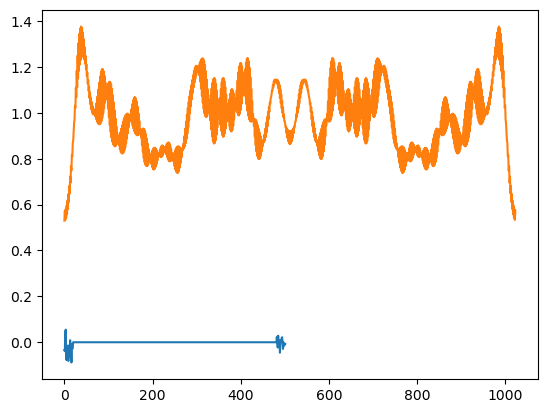

I have no idea what is going on here right now, but I don't have time to figure out how to get it somewhat correct before the deadline 😢


In [75]:
window_length = len(vowel_cepstrum_real)
window_half = np.concatenate([np.ones(20), np.zeros(window_length//2 - 20)])
window_symmetric = np.concatenate([window_half, window_half[::-1]])
vowel_cepstrum_liftered = vowel_cepstrum_real * window_symmetric
vowel_spectral_envelope = np.abs(np.exp(np.fft.fft(vowel_cepstrum_liftered, n=1024)))
plt.plot(vowel_cepstrum_liftered)
plt.plot(vowel_spectral_envelope)
plt.show()
print("I have no idea what is going on here right now, but I don't have time to figure out how to get it somewhat correct before the deadline 😢")
